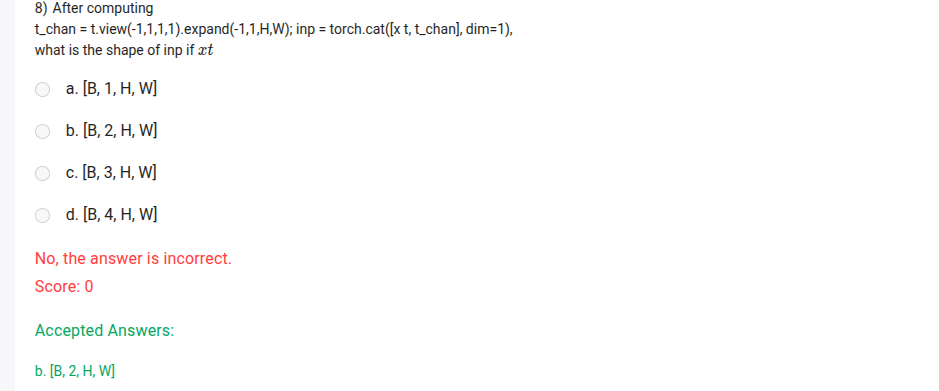

Xt -> [t=B] -> always B (timestamp)

- https://stackoverflow.com/questions/42479902/what-does-view-do-in-pytorch

- https://docs.pytorch.org/docs/stable/generated/torch.Tensor.view.html

- https://docs.pytorch.org/docs/stable/generated/torch.Tensor.expand.html

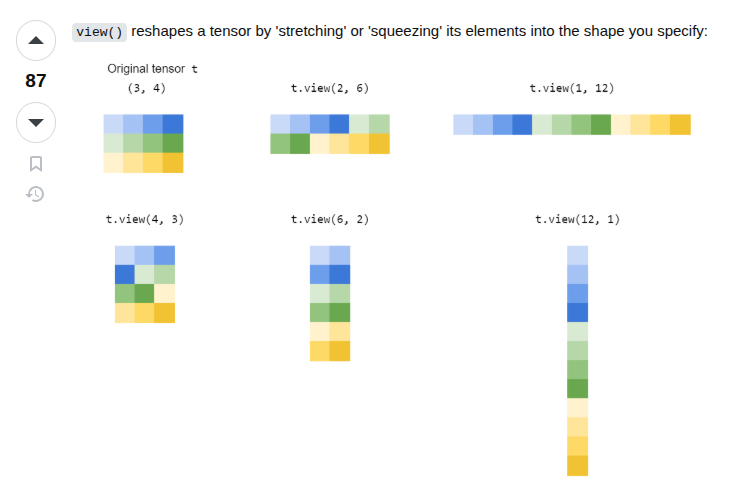

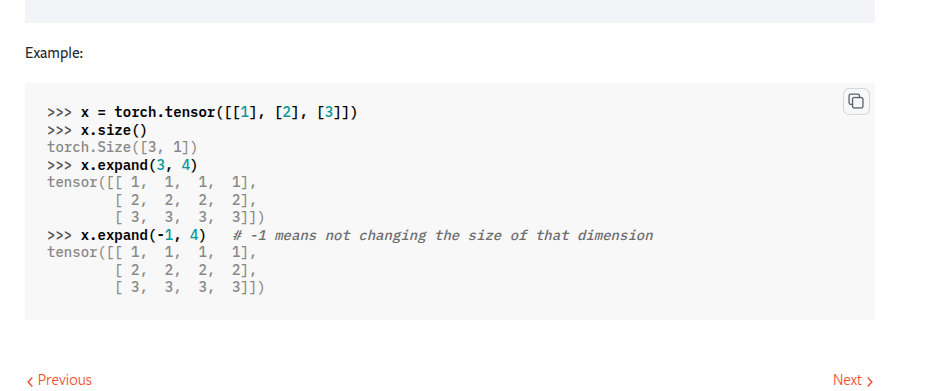

# Solution
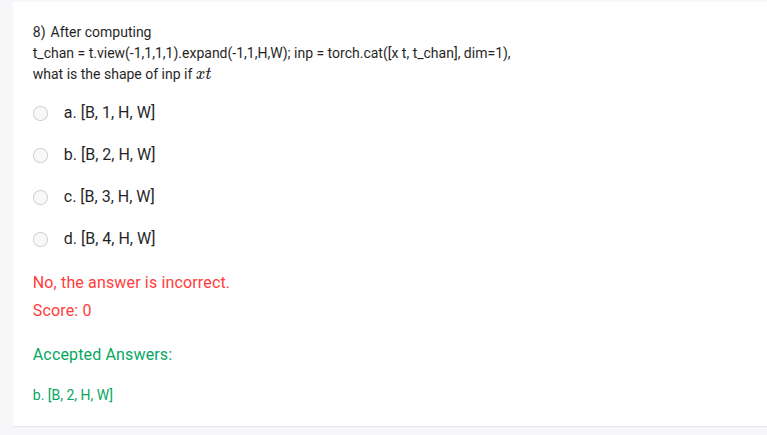

-> -1 means it can be any, 

t.view(-1,1,1,1) this means 4D matrix, with any number of rows, but 1,1,1 inner dimensions
ie. the tensor will be converted into a n rows, 1,1,1 matrix

then we expand it to (-1,1,H,W) this will expand accordingly

Let's break down the expression:

```python
t_chan = t.view(-1, 1, 1, 1).expand(-1, 1, H, W)
```

This is common in diffusion models and image-based tasks using PyTorch.

---

## 🔧 Step-by-Step Explanation

### 🎯 Goal

You have a **tensor `t`** of shape `[B]` (e.g., a 1D tensor containing timestep values for each image in a batch), and you want to **expand it to match the shape of an image tensor** `[B, 1, H, W]` so it can be concatenated with the image.

---

## 🔹 Example Setup

Let's say:

* Batch size `B = 2`
* Image height `H = 4`
* Image width `W = 4`

```python
import torch

B, H, W = 2, 4, 4
t = torch.tensor([10.0, 20.0])  # shape: [2]
```

---

## 🧩 1. `view(-1, 1, 1, 1)`

### ✅ What it does:

It reshapes `t` from `[2]` → `[2, 1, 1, 1]`

```python
t_reshaped = t.view(-1, 1, 1, 1)
print(t_reshaped.shape)  # torch.Size([2, 1, 1, 1])
print(t_reshaped)
```

### 📌 Why do this?

This makes `t` broadcastable with an image tensor of shape `[2, 1, 4, 4]`.

Now `t[i, :, :, :]` = scalar value for each sample `i` in the batch.

---

## 🧩 2. `expand(-1, 1, H, W)`

### ✅ What it does:

It expands the singleton dimensions (size=1) to shape `[2, 1, 4, 4]`, without copying data.

```python
t_expanded = t_reshaped.expand(-1, 1, H, W)
print(t_expanded.shape)  # torch.Size([2, 1, 4, 4])
print(t_expanded)
```

### 🧠 Note:

* `-1` means "keep the current size for this dimension"
* This operation is **memory-efficient** (no new memory allocated) unless a write operation is done

---

## ✅ Full Code Example

```python
import torch

B, H, W = 2, 4, 4
t = torch.tensor([10.0, 20.0])  # Shape: [2]

t_chan = t.view(-1, 1, 1, 1).expand(-1, 1, H, W)

print("t shape:", t.shape)              # [2]
print("t_chan shape:", t_chan.shape)    # [2, 1, 4, 4]
print("t_chan:")
print(t_chan)
```

---

## 🔍 Output

```text
t shape: torch.Size([2])
t_chan shape: torch.Size([2, 1, 4, 4])
t_chan:
tensor([[[[10., 10., 10., 10.],
          [10., 10., 10., 10.],
          [10., 10., 10., 10.],
          [10., 10., 10., 10.]]],

        [[[20., 20., 20., 20.],
          [20., 20., 20., 20.],
          [20., 20., 20., 20.],
          [20., 20., 20., 20.]]]])
```

---

## 🔄 Summary

| Operation             | What it Does                              | Output Shape   |
| --------------------- | ----------------------------------------- | -------------- |
| `view(-1, 1, 1, 1)`   | Reshape `[B] → [B, 1, 1, 1]`              | `[2, 1, 1, 1]` |
| `expand(-1, 1, H, W)` | Expand dimensions to match `[B, 1, H, W]` | `[2, 1, 4, 4]` |

---






Sure! Here's a simple **PyTorch example** that you can run in **Google Colab** to see how
`t.view(-1, 1, 1, 1).expand(-1, 1, H, W)` works and produces a tensor of shape `[B, 1, H, W]`.

---

### ✅ **Google Colab Code Example**

```python
# Install torch if not already installed (not needed in Colab usually)
# !pip install torch

import torch

# Define batch size and image height/width
B, H, W = 4, 32, 32

# Simulate a batch of noisy images x_t with shape [B, 1, H, W]
x_t = torch.randn(B, 1, H, W)
print("x_t shape:", x_t.shape)

# Simulate timesteps for each image in the batch, shape [B]
t = torch.tensor([10, 20, 30, 40])  # shape = [4]
print("t shape before reshape:", t.shape)

# Expand t to match [B, 1, H, W]
t_chan = t.view(-1, 1, 1, 1).expand(-1, 1, H, W)
print("t_chan shape after view + expand:", t_chan.shape)

# Concatenate x_t and t_chan along channel dimension
inp = torch.cat([x_t, t_chan], dim=1)
print("inp shape after concatenation:", inp.shape)
```

---

### 🧾 Output Explanation

If you run the code, you’ll get output like:

```
x_t shape: torch.Size([4, 1, 32, 32])
t shape before reshape: torch.Size([4])
t_chan shape after view + expand: torch.Size([4, 1, 32, 32])
inp shape after concatenation: torch.Size([4, 2, 32, 32])
```

---

### 📌 Summary

* `t.view(-1, 1, 1, 1)` → reshapes `[B]` into `[B, 1, 1, 1]`
* `.expand(-1, 1, H, W)` → broadcasts it to `[B, 1, H, W]`
* When concatenated with `x_t`, both have shape `[B, 1, H, W]`, so the result is `[B, 2, H, W]`



You're right, the correct answer is:

### ✅ **b. \[B, 2, H, W]**

---

### 🔍 Explanation:

We are given:

* `x_t` has shape: **`[B, 1, H, W]`** (batch of noisy grayscale images)
* `t` has shape: **`[B]`**, which is just the timestep as a scalar per batch element

Now we do:

```python
t_chan = t.view(-1, 1, 1, 1).expand(-1, 1, H, W)
```

This reshapes and expands `t` to shape: **`[B, 1, H, W]`**, matching `x_t`.

Then:

```python
inp = torch.cat([x_t, t_chan], dim=1)
```

This concatenates along the channel dimension → from 1 channel (`x_t`) + 1 channel (`t_chan`) → **2 channels**

---

### ✅ Final shape:

```python
inp.shape = [B, 2, H, W]
```

So the correct answer is **b. \[B, 2, H, W]**



- https://chatgpt.com/share/688e2d97-3af0-8007-ad32-76e8282803a3
- https://chatgpt.com/share/688e2da4-461c-8007-b7c0-4c116081e081